# STAT 301 Group Project Individual Assignment 1 
## Author: Ethan Rajkumar, #55024616
## TA: Joey Hotz 
## Group Number: 24 



The aim of this notebook is: 
* To provide a full discussion of the 'Employee' dataset 
* Establish a Question 
* Peform Data Preprocessing before implementing Methodology 

In [1]:
# IMPORT NECESSARY LIBRARIES
library(gridExtra)
library(grid)
library(dplyr)
library(tidyverse)
library(cowplot)
library(ggplot2)
library(GGally)
library(reshape2)
library(repr)
library(infer)
library(broom)
library(AER)
library(modelr)
library(caTools)
options(warn = -1)


Attaching package: ‘dplyr’


The following object is masked from ‘package:gridExtra’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggpl

In [2]:
employee <- read.csv("data/Employee.csv")
head(employee)
# Function to count categories for any given variable in the dataset
count_categories <- function(data, variable) {
    data %>%
        group_by({{ variable }}) %>%   # Using {{ }} allows for non-standard evaluation, so you can pass column names as arguments
        tally() %>%
        arrange(desc(n))               # Optional: arrange in descending order of counts
}

# Example usage with Education
count_categories(employee, Education)

# Example usage with other variables (City, PaymentTier, Gender, EverBenched, LeaveOrNot)
count_categories(employee, City)
count_categories(employee, PaymentTier)
count_categories(employee, Gender)
count_categories(employee, EverBenched)
count_categories(employee, LeaveOrNot)

Education JoiningYear City      PaymentTier Age Gender EverBenched
1 Bachelors 2017        Bangalore 3           34  Male   No         
2 Bachelors 2013        Pune      1           28  Female No         
3 Bachelors 2014        New Delhi 3           38  Female No         
4 Masters   2016        Bangalore 3           27  Male   No         
5 Masters   2017        Pune      3           24  Male   Yes        
6 Bachelors 2016        Bangalore 3           22  Male   No         
  ExperienceInCurrentDomain LeaveOrNot
1 0                         0         
2 3                         1         
3 2                         0         
4 5                         1         
5 2                         1         
6 0                         0

Education n   
1 Bachelors 3601
2 Masters    873
3 PHD        179

City      n   
1 Bangalore 2228
2 Pune      1268
3 New Delhi 1157

PaymentTier n   
1 3           3492
2 2            918
3 1            243

Gender n   
1 Male   2778
2 Female 1875

EverBenched n   
1 No          4175
2 Yes          478

LeaveOrNot n   
1 0          3053
2 1          1600

###  Data Description

#### Dataset Overview:
The Employees dataset provides anonymized data on company employees, including details such as educational attainment, job tenure, office location, salary tier, demographic attributes, and their work status within the organization. This dataset was gathered by the company’s Human Resources team and subsequently shared on Kaggle, a platform that hosts datasets and resources for data science professionals and enthusiasts.


#### Key Statistics:
- **Total Observations**: 4,653 employees
- **Total Variables**: 9 variables, each contributing to potential insights on employee demographics, job role characteristics, and retention patterns.

#### Variables:
| Variable                     | Type         | Description                                                                                                         | Categories/Range                                                                                                       |
|------------------------------|--------------|---------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------|
| **Education**                | Categorical  | Highest level of education attained by the employee.                                                               | **Bachelors** (n = 3601), **Masters** (n = 873), **PhD** (n = 179)                                                    |
| **JoiningYear**              | Numerical    | Year the employee joined the organization, representing tenure.                                                     | 2012 to 2018                                                                                                           |
| **City**                     | Categorical  | City in which the employee works.                                                                                   | **Bangalore** (n = 2228), **Pune** (n = 1268), **New Delhi** (n = 1157)                                               |
| **PaymentTier**              | Categorical  | Salary tier or pay level of the employee.                                                                           | **3** (n = 3492) - lowest, **2** (n = 918) - mid-level, **1** (n = 243) - highest                                      |
| **Age**                      | Numerical    | Age of the employee.                                                                                                | 22 to 41                                                                                                               |
| **Gender**                   | Categorical  | Gender of the employee.                                                                                             | **Male** (n = 2778), **Female** (n = 1875)                                                                             |
| **EverBenched**              | Binary       | Indicates if the employee has ever been benched (i.e., had a period without assigned work).                         | **No** (n = 4175), **Yes** (n = 478)                                                                                   |
| **ExperienceInCurrentDomain**| Numerical    | Years of experience in the employee's current field before joining the company.                                     | 0 to 7                                                                                                                 |
| **LeaveOrNot**               | Binary       | Target variable indicating if the employee left the company.                                                        | **0** (n = 3053) - stayed, **1** (n = 1600) - left                                                                     |
#### Dataset Description:
This dataset offers a mix of demographic, employment, and behavioral information. Each record captures unique attributes for individual employees, enabling analysis of factors that may contribute to whether an employee stays with or leaves the company. Insights drawn from this data can help organizations understand key drivers of employee retention and guide HR policy improvements.


[Link to the Dataset](https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset/data)



---


## Question:

*"Which specific factors, such as age, payment tier, benching status, and experience, are statistically significant predictors of whether an employee will leave the organization? Additionally, how does each factor impact the likelihood of turnover?"*

---

### Explanation of the Question

- **Objective**: This question aims to identify specific factors (e.g., age, payment tier, benching status, experience) that significantly influence employee turnover, focusing on measurable predictors rather than general trends.
  
- **Predictive Focus**: By examining the statistical significance and effect size of each factor, we seek to pinpoint exactly which variables contribute most to an employee's likelihood of leaving.

- **Outcome**: This analysis will reveal which factors (such as low payment tier or benching status) are strongly associated with higher turnover and clarify the extent of each factor's impact on retention. These insights will enable targeted, data-driven retention strategies.

### Project Goals

1. Explore the relationship between specific predictors in the dataset and employee retention (`LeaveOrNot`).
   
2. Identify the key predictors associated with `LeaveOrNot` and train a predictive model to assess an employee's probability of leaving the organization.

3. Determine how this model holds in predicting probability of turnover.



## Exploratory Data Analysis and Visualization


### Data Preprocessing
We first split our dataset into training and testing dataset. This way we can choose a model in the training phase of our regression and test our model on our dataset. 

In [1]:
# Set a seed for reproducibility
set.seed(12300000)

# Split the dataset into training (80%) and testing (20%) sets
split <- sample.split(employee$LeaveOrNot, SplitRatio = 0.8)
training_set <- subset(employee, split == TRUE)
testing_set <- subset(employee, split == FALSE)

# Convert necessary columns to factors in both training and testing sets
convert_to_factors <- function(data) {
  data %>%
    mutate(
      Education = as.factor(Education),
      City = as.factor(City),
      Gender = as.factor(Gender),
      EverBenched = as.factor(EverBenched),
      PaymentTier = as.factor(PaymentTier),
      LeaveOrNot = as.factor(LeaveOrNot)
    )
}

# Apply factor conversion function to training and testing sets
employee_train <- convert_to_factors(training_set)
employee_test <- convert_to_factors(testing_set)

# Verify the split and factor conversion
cat("Training Set Size:", nrow(training_set), "\n")
cat("Testing Set Size:", nrow(testing_set), "\n")



ERROR: Error in sample.split(employee$LeaveOrNot, SplitRatio = 0.8): could not find function "sample.split"


Now that the dataset has been split into employee_train and test. Let's visualize employee_train by taking a look at the categorical variables and the box plot medians. 

In [4]:
options(warn = -1)
# Ensure 'LeaveOrNot' is a factor for proper grouping
employee_train <- employee_train %>%
  mutate(LeaveOrNot = as.factor(LeaveOrNot))

# Calculate variance for each numerical variable by LeaveOrNot
numeric_vars <- employee_train %>% select(where(is.numeric), LeaveOrNot)

numeric_vars_names <- names(numeric_vars)

categorical_vars <- employee_train %>% select(-numeric_vars_names, -LeaveOrNot)
categorical_vars$LeaveOrNot <- employee_train$LeaveOrNot


### Cardinality Plots and Their Importance

Cardinality plots are valuable tools in data analysis for visualizing the distribution and diversity of categorical variables in relation to an outcome variable. By examining these variables across different levels of an outcome (such as `LeaveOrNot`), these plots help reveal patterns or imbalances that may indicate underlying trends, biases, or specific behaviors within groups that could influence the target variable. For example, if certain education levels or cities are predominantly associated with one outcome (like staying or leaving a company), this insight can support stakeholders in making data-driven decisions or refining models to better account for these relationships.


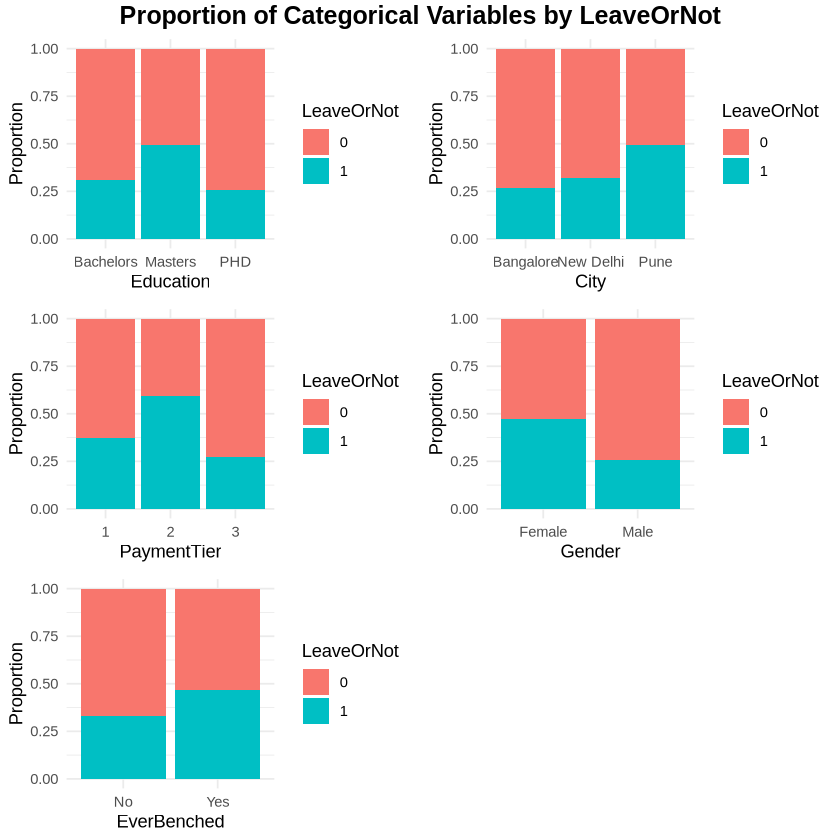

In [5]:
cardinality_plots <- lapply(names(categorical_vars)[-ncol(categorical_vars)], function(var) {
  ggplot(categorical_vars, aes(x = .data[[var]], fill = LeaveOrNot)) +
    geom_bar(position = "fill") +
    labs(x = var, y = "Proportion") +
    theme_minimal()
})

grid.arrange(
  grobs = cardinality_plots, 
  ncol = 2,  # Adjust as needed for layout
  top = textGrob("Proportion of Categorical Variables by LeaveOrNot", 
                 gp = gpar(fontsize = 15, fontface = "bold"))  # Customize title size and style here
)

### Analysis of Cardinality Plots
In the plots, we observe the following patterns: individuals with a Master’s degree appear more likely to stay (indicated by a smaller proportion of `LeaveOrNot` equal to 1 in teal) compared to those with a Bachelor's or PhD. Employees in New Delhi show a slightly higher retention rate (a smaller teal section for `LeaveOrNot` equal to 1) compared to those in Bangalore and Pune. For `PaymentTier`, employees in tier 1 have a higher likelihood of staying, while those in tiers 2 and 3 show a larger proportion of individuals leaving. In terms of `Gender`, females have a marginally higher retention rate than males, as seen in a smaller proportion of teal in the `LeaveOrNot` equal to 1 category for females. Lastly, employees who have been benched (`EverBenched` set to "Yes") are more likely to leave, with a higher teal proportion in that category compared to those who haven’t been benched. These insights suggest that factors such as education level, payment tier, and benching status may significantly influence an employee’s decision to stay or leave, offering valuable direction for workforce retention strategies.


### Box Plots for Numeric Variables

Box plots are effective for visualizing the distribution, central tendency, and spread of numeric variables across different categories or outcomes. In this case, box plots show how numeric variables like `Joining Year`, `Age`, and `ExperienceInCurrentDomain` are distributed based on the "LeaveOrNot" factor. Each plot highlights the median, interquartile range (IQR), and potential outliers, which gives insight into differences in these variables for employees who stayed (0) versus those who left (1).




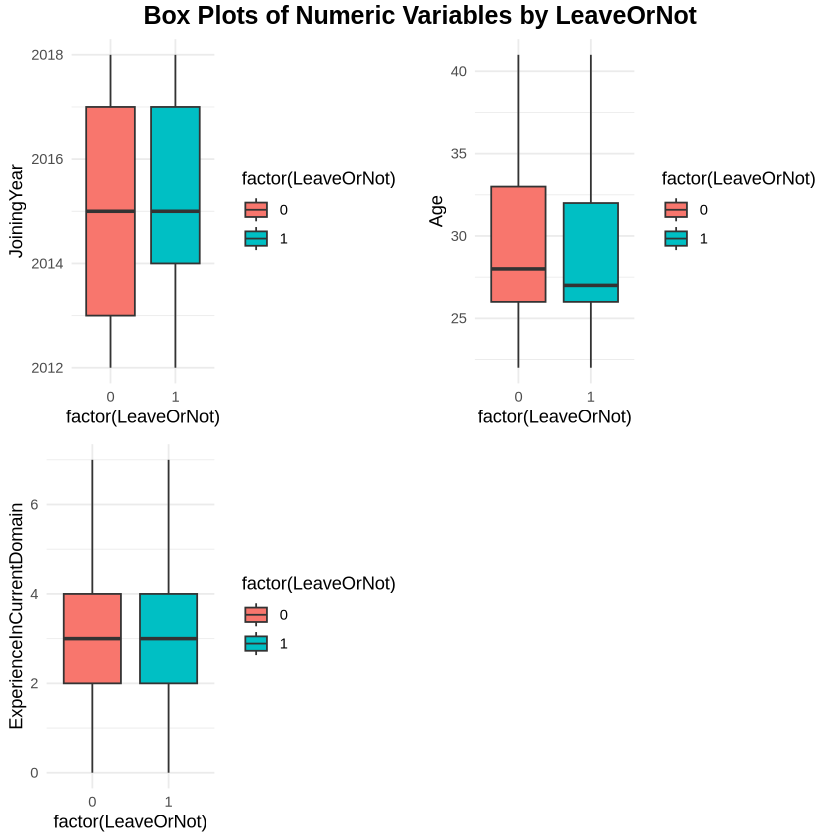

In [6]:
box_plots <- lapply(names(numeric_vars)[-ncol(numeric_vars)], function(var) {
  ggplot(numeric_vars, aes(x = factor(LeaveOrNot), y = .data[[var]], fill = factor(LeaveOrNot))) +
    geom_boxplot() +
    theme_minimal()
})

grid.arrange(
  grobs = box_plots,
  ncol = 2,  # Adjust layout as needed
  top = textGrob("Box Plots of Numeric Variables by LeaveOrNot",
                 gp = gpar(fontsize = 15, fontface = "bold"))
)

### Anaylsis of Box Plots
In the box plots, we observe that employees with more recent `JoiningYear` show a slight tendency to leave, as indicated by a higher median joining year in the teal box for `LeaveOrNot` equal to 1 (left), while those who stayed tend to have an earlier `JoiningYear,` suggesting that longer tenure might correlate with higher retention. `Age` distributions are fairly similar across both groups, with a slightly younger median for employees who left, hinting that younger employees might be marginally more prone to leaving, though the difference is minimal. `ExperienceInCurrentDomain` also shows a similar distribution, with a slightly higher median experience for those who stayed, implying that more domain experience might be associated with a higher likelihood of staying, though this difference is subtle. These box plots reveal subtle trends in numeric variables related to employee retention, offering insights into workforce dynamics influenced by `JoiningYear`, `Age`, and `ExperienceInCurrentDomain`.



## Pairwise Plots 

Pairwise plots are useful in logistic regression because they help us understand the relationships, distributions, and potential correlations among predictor variables, as well as their association with the outcome variable. By visualizing these pairwise relationships, we can identify any collinearity or multicollinearity between predictors, which can negatively impact model performance if left unaddressed. Pairwise plots also reveal trends and patterns that might suggest which predictors are relevant to the outcome, allowing us to make more informed decisions about variable selection and transformations. 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


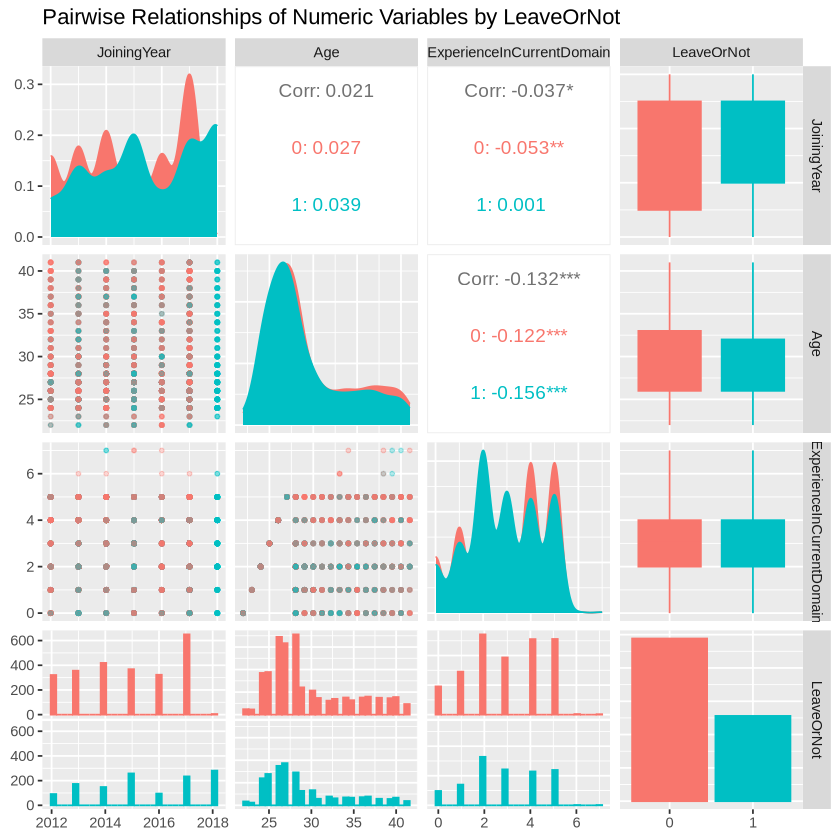

In [7]:
# Create ggpairs plot for all numeric variables
ggpairs(numeric_vars,
        aes(color = LeaveOrNot, fill = LeaveOrNot), 
        title = "Pairwise Relationships of Numeric Variables by LeaveOrNot",
        upper = list(continuous = wrap("cor", size = 4)), 
        lower = list(continuous = wrap("points", alpha = 0.3, size = 1)), 
        diag = list(continuous = wrap("densityDiag"))) 

Correlation values in the plot indicate that `Age` and `ExperienceInCurrentDomain` have negative relationships with `LeaveOrNot`, suggesting that younger employees and those with less domain experience are more likely to leave. Density plots reveal that employees who joined more recently (indicated by peaks in the most recent years) show a higher likelihood of leaving. Scatterplots and histograms help visualize the distribution and clustering within each variable, reinforcing that employees with an earlier `JoiningYear`, higher `Age`, and more `ExperienceInCurrentDomain` tend to stay (red section). The box plots further support these trends by illustrating higher medians for `JoiningYear`, `Age`, and `ExperienceInCurrentDomain` among employees who stayed. 


# Conclusion 
After exploring all eight input variables, we conclude that `Education`, `Gender`, `PaymentTier`, `City`, and `EverBenched` may be strong predictors of `LeaveOrNot`, while `Age`, `JoiningYear`, and `ExperienceInCurrentDomain` seem less relevant due to apparent multicollinearity. Since this is merely an exploration of the variables without conducting a proper logistic regression, these conclusions are speculative.

Based on these insights, we will proceed to design both forward and backward selection algorithms for logistic regression on the training data. We will then choose the best model and use it to predict on the testing data.

For now, let's save our training and testing sets as CSV files to ensure we use the same datasets throughout.


In [8]:
write.csv(employee_train, "data/employee_train.csv")
write.csv(employee_test, "data/employee_test.csv")